# Предобработка текста

## Загрузка

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data_url = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/A-and-B-Strugatsky-Probationers-en.txt'
data_file = open(data_url)

data = data_file.read()
data = data.replace('\n', ' ').replace('\t', ' ').replace('     ', ' ').replace('  ', ' ')

# Разбиение по предложениям

In [3]:
import nltk

nltk.download('punkt')

sentences = nltk.sent_tokenize(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
sentences[0:5]

['Arkady and Boris Strugatsky.',
 'Probationers (engl).',
 'A massive red and white coach arrived.',
 'Departure was announced.',
 '- Alright, off you go, - said Daugeh.']

# Исследование текста

In [5]:
sentences[10:20]

['Bykov gave him a strict look.',
 '- Button up your shirt, - he said.',
 "- Dad, I'm hot, - Grisha said.",
 '- Do up your shirt, - Bykov repeated.',
 "- Don't walk around like a slouch.",
 "- Don't look at me, - said Yurkovski.",
 "- I am allowed, whilst you aren't yet.",
 'Daugeh looked at him and shifted his eyes.',
 "Didn't feel like looking at Yurkovski - seeing his self-assured flabby face with a surly drooping lower lip, his heavy monogrammed satchel, his stylish suit made from rare stereosynthetics.",
 'Rather felt like looking up above into the transparent sky, clear, blue, with not one cloud, not even birds - above the airfield they were dispersed with ultrasound sirens.']

In [6]:
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(
    binary=True,
    stop_words=stopwords.words('english')
)
X = countVectorizer.fit_transform(sentences)

In [8]:
countVectorizer.get_feature_names_out()[0:20]

array(['02', '17', '20', '205', '211', 'abandoned', 'abastumaine',
       'ability', 'able', 'abnormal', 'abnormally', 'aboard',
       'abominable', 'abrasion', 'abruptly', 'absence', 'absent',
       'absolute', 'absolutely', 'absorbed'], dtype=object)

In [9]:
!python -m spacy download en_core_web_sm

2023-12-04 11:57:27.360334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 11:57:27.360416: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 11:57:27.360470: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 11:57:27.376308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 11:57:30.965459: W tensorflow/compiler/

In [10]:
import spacy

nlp = spacy.load('en_core_web_sm')

def tokenizer_func(sent):
  tokens = [token.lemma_ for token in nlp(sent) if token.is_alpha]
  return tokens

In [11]:
tokenizer_func(sentences[19])

['rather',
 'feel',
 'like',
 'look',
 'up',
 'above',
 'into',
 'the',
 'transparent',
 'sky',
 'clear',
 'blue',
 'with',
 'not',
 'one',
 'cloud',
 'not',
 'even',
 'bird',
 'above',
 'the',
 'airfield',
 'they',
 'be',
 'disperse',
 'with',
 'ultrasound',
 'siren']

In [12]:
countVectorizer = CountVectorizer(
    binary=True,
    stop_words=stopwords.words('english'),
    tokenizer=tokenizer_func
)
X = countVectorizer.fit_transform(sentences)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'could', 'far', 'might', 'must', 'need', 'sha', 'win', 'would'] not in stop_words.
  warnings.warn(


In [13]:
countVectorizer.get_feature_names_out()[0:20]

array(['I', 'abandon', 'abastumaine', 'ability', 'able', 'abnormal',
       'abnormally', 'aboard', 'abominable', 'abrasion', 'abruptly',
       'absence', 'absent', 'absolute', 'absolutely', 'absorb',
       'absorption', 'absurd', 'absurdly', 'abundance'], dtype=object)

In [14]:
import pandas as pd

col_names = countVectorizer.get_feature_names_out()

data_df = pd.DataFrame(
    data = X.toarray(),
    columns = col_names
)

In [15]:
data_df

,I,abandon,abastumaine,ability,able,abnormal,abnormally,aboard,abominable,abrasion,...,zhat,zhey,zhilin,zina,zinc,zinochka,zone,zoom,zoya,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7538,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7539,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


step 98/98: apriori min support 0.003 | conf rules 3 | lift rules 12


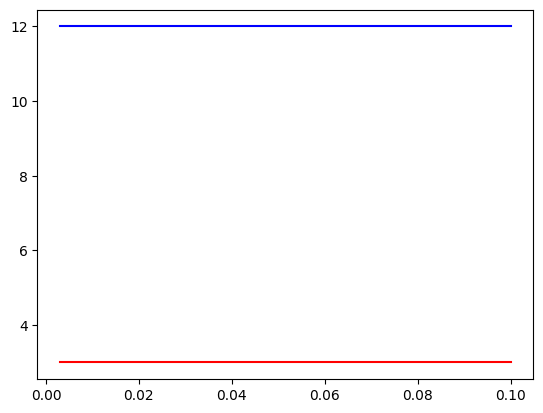

In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from google.colab import output
import matplotlib.pyplot as plt

search_grid = {
    'apriori_min_support': [x / 1000 for x in range(100, 2, -1)]
}

conf_rules_count = []
lift_rules_count = []

for i, apriori_min_support in enumerate(search_grid['apriori_min_support']):
  apriori_df = apriori(data_df, min_support=0.003, use_colnames=True, max_len=2)

  conf_df = association_rules(apriori_df, metric='confidence', min_threshold=1.0)
  lift_df = association_rules(apriori_df, metric='lift', min_threshold=10)

  conf_rules_count.append(conf_df.shape[0])
  lift_rules_count.append(lift_df.shape[0])
  output.clear()
  print(f'step {i+1}/{len(search_grid["apriori_min_support"])}: apriori min support {apriori_min_support} | conf rules {conf_df.shape[0]} | lift rules {lift_df.shape[0]}')

plt.plot(search_grid['apriori_min_support'], conf_rules_count, 'r')
plt.plot(search_grid['apriori_min_support'], lift_rules_count, 'b')
plt.show()

In [18]:
conf_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(antonovich),(michael),0.019889,0.024132,0.019889,1.0,41.439560,0.019409,inf,0.995671
1,(ward),(room),0.003050,0.010077,0.003050,1.0,99.236842,0.003019,inf,0.992951
2,(sergeevich),(vladimir),0.006630,0.007690,0.006630,1.0,130.034483,0.006579,inf,0.998932


In [19]:
lift_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(michael),(antonovich),0.024132,0.019889,0.019889,0.824176,41.439560,0.019409,5.574383,1.000000
1,(antonovich),(michael),0.019889,0.024132,0.019889,1.000000,41.439560,0.019409,inf,0.995671
2,(base),(old),0.005436,0.012994,0.004375,0.804878,61.942758,0.004305,5.058406,0.989234
3,(old),(base),0.012994,0.005436,0.004375,0.336735,61.942758,0.004305,1.499496,0.996808
4,(inspector),(chief),0.006099,0.005701,0.004773,0.782609,137.265925,0.004738,4.573774,0.998807
5,(chief),(inspector),0.005701,0.006099,0.004773,0.837209,137.265925,0.004738,6.105391,0.998407
6,(shake),(head),0.005569,0.018032,0.003845,0.690476,38.290966,0.003745,3.172511,0.979338
7,(head),(shake),0.018032,0.005569,0.003845,0.213235,38.290966,0.003745,1.263950,0.991768
8,(room),(ward),0.010077,0.003050,0.003050,0.302632,99.236842,0.003019,1.429589,1.000000
9,(ward),(room),0.003050,0.010077,0.003050,1.000000,99.236842,0.003019,inf,0.992951


# Граф знаний

In [20]:
!pip install owlready2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from owlready2 import *
import types

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
ontology = get_ontology('http://itmo.ru/his3.okladnikov.owl')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#ontology.destroy()
with ontology:
  sent_clazz = types.new_class('Sentence', (Thing,))
  index_clazz = types.new_class('index', (DataProperty, FunctionalProperty))
  text_clazz = types.new_class('text', (DataProperty, FunctionalProperty))
  has_token = types.new_class('hasToken', (ObjectProperty,))
  has_token.domain.append(sent_clazz)
  token_clazz = types.new_class('Token', (Thing,))
  has_token.range.append(token_clazz)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# create tokens individuals
with ontology:
  for i, token in enumerate(col_names):
    token_individ = token_clazz(f'Token{i}')
    token_individ.label = token

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# create sentences individuals
with ontology:
  for index, row in data_df.iterrows():
    sent_individ = sent_clazz()
    sent_individ.index = index
    sent_individ.text = sentences[index]
    for i, value in enumerate(data_df.columns):
      if (row[value] == 1):
        sent_individ.hasToken.append(ontology[f'Token{i}'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
ant = [v for v, in conf_df['antecedents'].values]
con = [v for v, in conf_df['consequents'].values]
with ontology:
  subclass_fp = types.new_class('sublassOf', (ObjectProperty, FunctionalProperty))
  subclass_fp.domain.append(token_clazz)
  subclass_fp.range.append(token_clazz)

  for a, c in zip(ant, con):
    token_a = ontology.search_one(label = a)
    token_c = ontology.search_one(label = c)
    token_a.subclassOf = token_c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
with ontology:
  lift = types.new_class('lift', (ObjectProperty, TransitiveProperty))
  for row in lift_df.values:
    a, b = [v for v, in row[:2]]
    token_a = ontology.search_one(label = a)
    token_b = ontology.search_one(label = b)
    token_a.lift.append(token_b)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
with ontology:
  sync_reasoner_pellet(debug = 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.10/dist-packages/owlready2/pellet/jena-core-2.10.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/log4j-core-2.19.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/commons-codec-1.6.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/usr/local/lib/python3.10/

In [34]:
ontology.save(file = "onto-his-3.owl", format = "ntriples")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
